In [1]:
### Import Functions
from DirectFunctions import import_fx_data, plot_forex, direct_daily_rets, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [2]:
### Call Function to Load in Rate Data
forex_pairs = ['USDCAD=X', 'AUDJPY=X']
start_date = '2023-07-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,USDCAD=X,AUDJPY=X
257,2024-06-26,1.36611,106.103996
258,2024-06-27,1.37045,106.719002
259,2024-06-28,1.36993,106.862999
260,2024-07-01,1.36727,107.370003
261,2024-07-02,1.37390,NaN


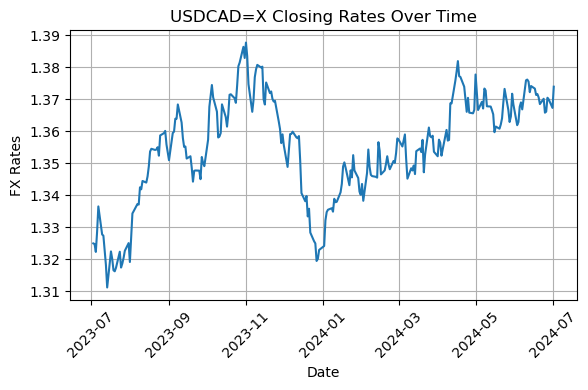

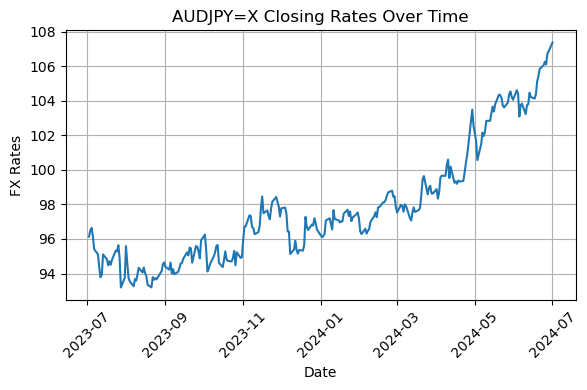

In [3]:
### Plot FX Pairs
plot_forex(forex_data, forex_pairs)


In [4]:
### Call Function to Calculate Daily Returns
daily_returns = direct_daily_rets(forex_data)
print(daily_returns.head())


        Date  USDCAD=X  AUDJPY=X
0 2023-07-04 -0.000151  0.003703
1 2023-07-05 -0.001849  0.001555
2 2023-07-06  0.004719 -0.005070
3 2023-07-07  0.005984 -0.007707
4 2023-07-10 -0.006539 -0.003186


In [5]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(forex_pairs, daily_returns)
print("Hedge Ratio:", hedge_ratio)


Hedge Ratio: -0.7048340512669751


In [6]:
### Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, forex_pairs, daily_returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  704.8341
Recent Hedged Cumulative Returns:  256    1107.582912
257    1115.626554
258    1116.264257
259    1117.829598
260    1123.250093
dtype: float64
Recent Unhedged Cumulative Returns:  256    1031.026353
257    1034.301865
258    1033.909419
259    1031.901844
260    1036.905665
Name: USDCAD=X, dtype: float64


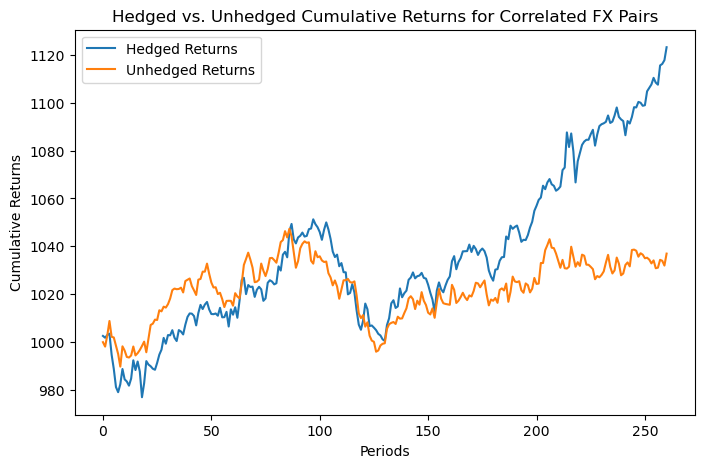

In [7]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [8]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_returns)


Metric                                  Hedged        Unhedged
Total Returns                         123.2501         36.9057
Annualized Returns                    104.2155         32.4400
Mean Return                          1036.1990       1022.4343
Standard Deviation                     33.5244         12.4070
Sharpe Ratio                          490.6620       1308.1828

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 490.6620,
which means for every unit of risk, the hedged portfolio is generating 490.6620 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 1308.1828,
indicating that for every unit of risk, the unhedged portfolio is generating 1308.1828 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
